USE SVM with
1) linear kernel
2) polynomial kernel
3) RBF kernel

Factors to choose for prediction: 
(possible: Sky cover, relative humidity, precipitation, temperature, dew point, wind speed)

Training set:
CV:
Test set: 

Short term weather forecasts for how many hours into the future?

Use PCA to improve and reduce redundant parameters // examine correlation between variables to begin with and choose that which isn't related

Linear R^2 score
0.958624795379
RBF R^2 score
0.96155168192
Polynomial R^2 score
0.553626719589

In [1]:
# IMPORT MODULES

%matplotlib inline

import datetime
import time
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import calendar
import sklearn.preprocessing as pp
from sklearn.cross_validation import train_test_split
import pandas as pd

In [2]:
# READ DATA
data = pd.read_csv("DonneesMeteo.txt", sep=" ", header=1)
data["Date"] = pd.to_datetime(data["Date"], format="%Y%m%d")

In [3]:
dataset = np.array(data[["IrrPOA(W/m2)", "P1(W)"]]).astype(np.float)

#Remove nan and infinite values
masknan = ~np.any(np.isnan(dataset), axis=1)
dataset = dataset[masknan]
maskfin = np.any(np.isfinite(dataset), axis=1)
dataset = dataset[maskfin]
X=dataset[:,0]
y=dataset[:,1]

X = np.reshape(X,(len(X),1))
'''
#check if nan and inf values
print(np.any(np.isnan(X)))
print(np.any(np.isnan(y)))
print(np.all(np.isfinite(X)))
print(np.all(np.isfinite(y)))

#check shape
print(np.shape(X))
print(np.shape(y))
'''
#SCALE INDEPENDENT DATA
X=pp.StandardScaler().fit_transform(X)

In [4]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

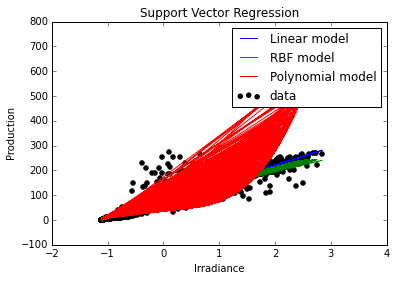

Linear R^2 score
0.958624795379
RBF R^2 score
0.96155168192
Polynomial R^2 score
0.553626719589


In [5]:
#Setting C: C is 1 by default. Noisy observations : decrease C

svr_lin = SVR(kernel='linear')
svr_lin.fit(X_training, y_training)
y_lin = svr_lin.predict(X_test)

svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_training, y_training)
y_rbf = svr_rbf.predict(X_test)

svr_poly = SVR(kernel='poly')
svr_poly.fit(X_training, y_training)
y_poly = svr_poly.predict(X_test)

# look at the results
plt.scatter(X_test, y_test, c='k', label='data')
plt.hold('on')
plt.plot(X_test, y_lin, c='r', label='Linear model')
plt.plot(X_test, y_rbf, c='g', label='RBF model')
plt.plot(X_test, y_poly, c='b', label='Polynomial model')
plt.xlabel('Irradiance')
plt.ylabel('Production')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

#R^2 score: nearer 1 the better
print("Linear R^2 score")
print(svr_lin.score(X_test,y_test)) 
print("RBF R^2 score")
print(svr_rbf.score(X_test,y_test))
print("Polynomial R^2 score")
print(svr_poly.score(X_test,y_test)) 